In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from get_Data import getData,getSample
from myplot import myplot1


In [94]:
X1,Y1 = getSample("bearing/K004/","N15_M07_F10_K004_1")
X2,Y2 = getSample("bearing/KA04/","N15_M07_F10_KA04_1")
X3,Y3 = getSample("bearing/KI18/","N15_M07_F10_KI18_1")
X4,Y4 = getSample("bearing/KB27/","N15_M07_F10_KB27_1")
lx = np.linspace(0,4,256000)
Y1 = Y1[0:len(lx)]
Y2 = Y2[0:len(lx)]
Y3 = Y3[0:len(lx)]
Y4 = Y4[0:len(lx)]



def myplot2(tt,data, anomalies):
    
    ano1 = anomalies.iloc[0:,0]  
    dataA = data.iloc[0:,0]
    aa = []
    at = []
    anom = 0  
    
    for i in range(0,len(tt)):
        
        if ano1[i]==True:
            aa.append(dataA[i])
            at.append(tt[i])
            anom = anom +1
    
    sns.set(rc= {"figure.figsize": (10,5)})
    fig, ax1 = plt.subplots(nrows=1,ncols=1,figure= (10,5))


    


    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="Gesund",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/$s^2$]")
    ax1.set_xlabel("Zeit in [s]")
    ax1.legend()
    
    plt.show()
    return anom


c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicte

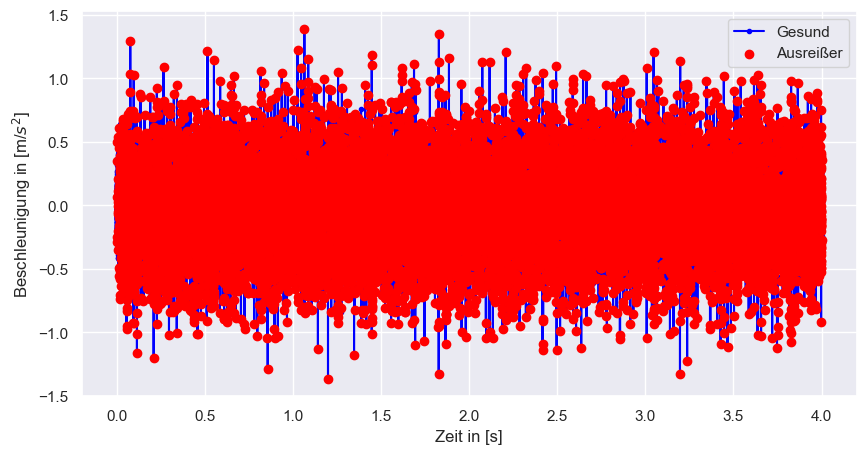

#######################_Anzahl =  15293


In [95]:
from adtk.detector import PersistAD
time = pd.to_datetime(lx,unit="s")


ds1 = pd.DataFrame(index=time,data={"healthy":Y1})
ds2 = pd.DataFrame(index=time,data={"healthy":Y2})
ds3 = pd.DataFrame(index=time,data={"healthy":Y3})
ds4 = pd.DataFrame(index=time,data={"healthy":Y4})


persist_ad = PersistAD(c=1.5)
anomalies1 = persist_ad.fit_detect(ds1)
anomalies2 = persist_ad.fit_detect(ds2)
anomalies3 = persist_ad.fit_detect(ds3)
anomalies4 = persist_ad.fit_detect(ds4)
#anomalies = anomalies.dropna()

#myplot1(lx,s,anomalies)
aa = myplot2(lx,ds1,anomalies1)
print("#######################_Anzahl = ",aa)





(20472, 8)
(20472, 8)


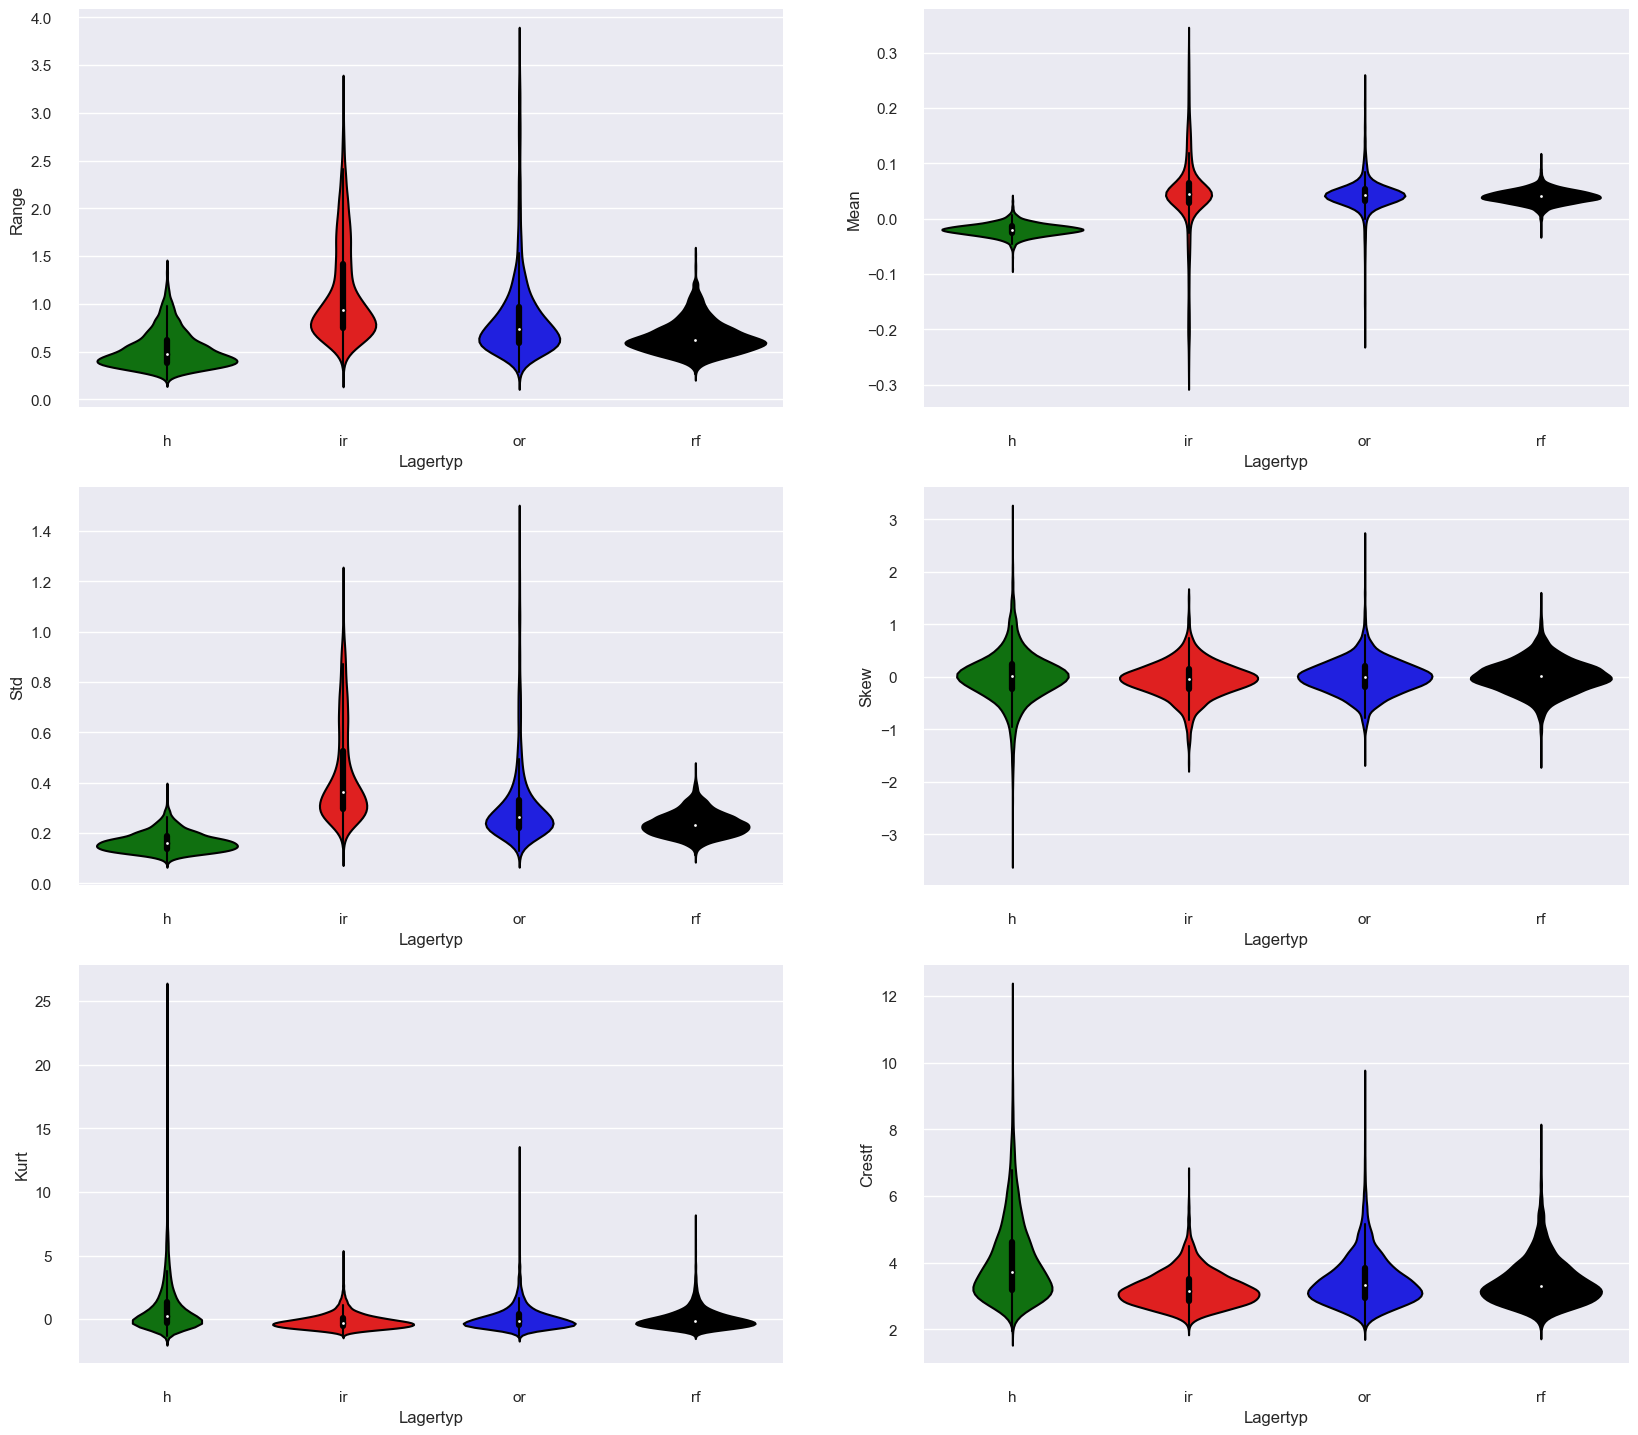

In [96]:
def makeFrame(df,wwin,label):
    ss = (int) (wwin/2)
    nn = "ssssssss"
    if label ==0:
        nn = "h"
    if label == 1:
        nn = "ir"
    if label == 2:
        nn = "or"
    if label == 3:
        nn = "rf"

    dfRange = df.abs().rolling(window=wwin,step=ss).max()-df.abs().rolling(window=wwin,step=ss).min()
    dfMean = df.rolling(window = wwin,step=ss).mean()
    dfStd = df.rolling(window= wwin,step=ss).std()
    dfSkew = df.rolling(window= wwin,step=ss).skew()
    dfKurt = df.rolling(window= wwin,step=ss).kurt()
    dfCrest = df.abs()
    dfCrest = dfCrest.rolling(window= wwin,step=ss).max()/df.abs().rolling(window = wwin,step=ss).mean()
    #dfCrest = dfCrest/dfMean.abs().mean()
    
    dfAll = pd.DataFrame(index = dfRange.index.values,data ={"Range": dfRange["data1"],"Mean":dfMean["data1"],"Std":dfStd["data1"],
                                                            "Skew": dfSkew["data1"],"Kurt": dfKurt["data1"],"Crestf": dfCrest["data1"],
                                                            "label":np.full(shape=len(dfRange),fill_value=label),
                                                            "Lagertyp":np.full(shape=len(dfRange),fill_value=nn)})
    dfAll.head()
    return dfAll




ds1 = pd.DataFrame(index = lx, data = {"data1" : Y1})
ds2 = pd.DataFrame(index = lx, data = {"data1" : Y2})
ds3 = pd.DataFrame(index = lx, data = {"data1" : Y3})
ds4 = pd.DataFrame(index = lx, data = {"data1" : Y4})


#df1 = pd.DataFrame(index = lx, data = {"data1" : mean1})
#df2 = pd.DataFrame(index = lx, data = {"data1" : mean2})
#df3 = pd.DataFrame(index = lx, data = {"data1" : mean3})
#df4 = pd.DataFrame(index = lx, data = {"data1" : mean4})



win = 100

dfHealth1 = makeFrame(ds1,win,0)
dfBrokeI1 = makeFrame(ds2,win,1)
dfBrokeO1 = makeFrame(ds3,win,2)
dfReal1 = makeFrame(ds4,win,3)





#dfHealth2 = makeFrame(df1,win,0)
#dfBrokeI2 = makeFrame(df2,win,1)
#dfBrokeO2 = makeFrame(df3,win,2)
#dfReal2 = makeFrame(df4,win,3)


#dfAll = pd.concat([dfHealth,dfBrokeI])
#dfAll = pd.concat([dfHealth,dfBrokeI,dfBrokeO])
dfAll1 = pd.concat([dfHealth1,dfBrokeI1,dfBrokeO1,dfReal1])
#dfAll2 = pd.concat([dfHealth2,dfBrokeI2,dfBrokeO2,dfReal2])
dfAll1 = dfAll1.dropna()
#dfAll2 = dfAll2.dropna()
print(dfAll1.shape)
print(dfAll1.shape)
def plot_violin(y2,i):
    plt.subplot(5,2,i)
    
    sns.violinplot(x='Lagertyp',y= y2, data=dfAll1,palette=["green","red","blue","black"])
    

plt.figure(figsize=(20,30))
i = 1
for measurement in dfAll1.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=False)
    i += 1


c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\seaborn\_oldcore.py:1

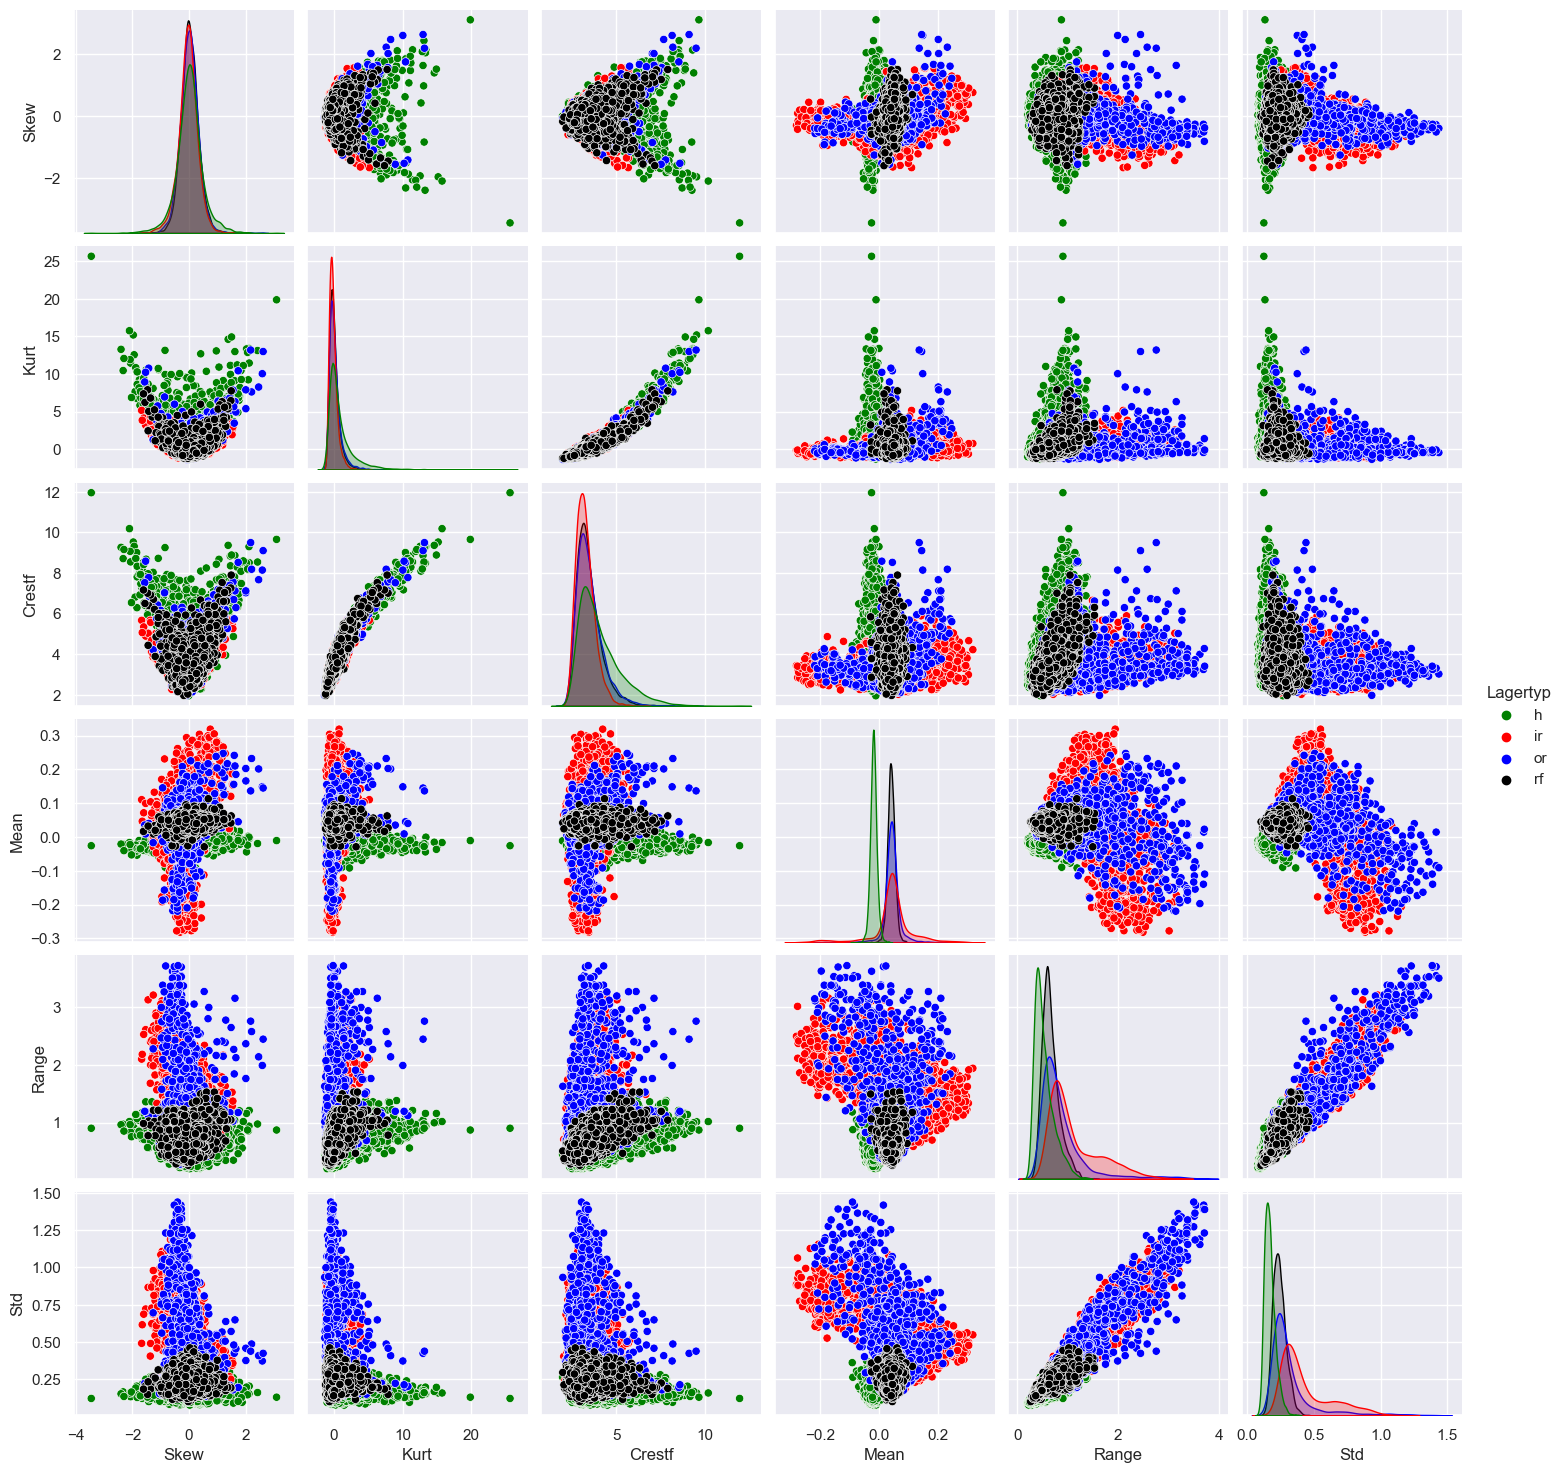

In [97]:

    
sns.pairplot(dfAll1, hue = 'Lagertyp', vars = ['Skew', 'Kurt', 'Crestf', 'Mean',"Range","Std"], palette = ["green","red","blue","black"] )



Our model accuracy with k=3 is: 0.6434153966393122
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1233
           1       0.67      0.71      0.69      1312
           2       0.41      0.14      0.21      1242
           3       0.50      0.75      0.60      1331

    accuracy                           0.64      5118
   macro avg       0.62      0.64      0.61      5118
weighted avg       0.62      0.64      0.61      5118



<Figure size 500x500 with 0 Axes>

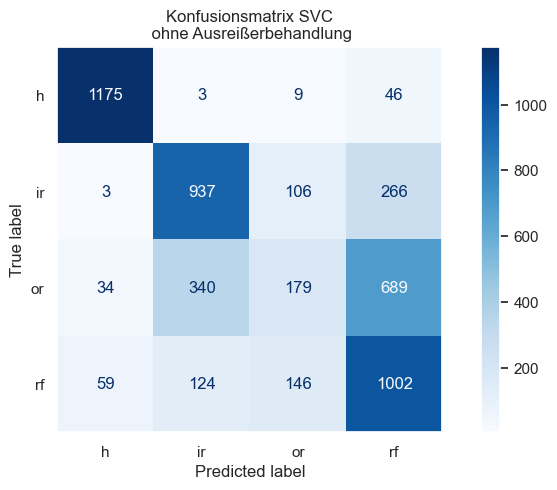

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X = dfAll1[['Range', 'Mean', 'Std','Kurt','Skew','Crestf']]
y = dfAll1['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


clf = SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n ohne Ausreißerbehandlung"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))

Our model accuracy with k=3 is: 0.5572489253614693
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1233
           1       0.55      0.67      0.61      1312
           2       0.34      0.29      0.31      1242
           3       0.47      0.39      0.43      1331

    accuracy                           0.56      5118
   macro avg       0.54      0.56      0.55      5118
weighted avg       0.54      0.56      0.54      5118



<Figure size 500x500 with 0 Axes>

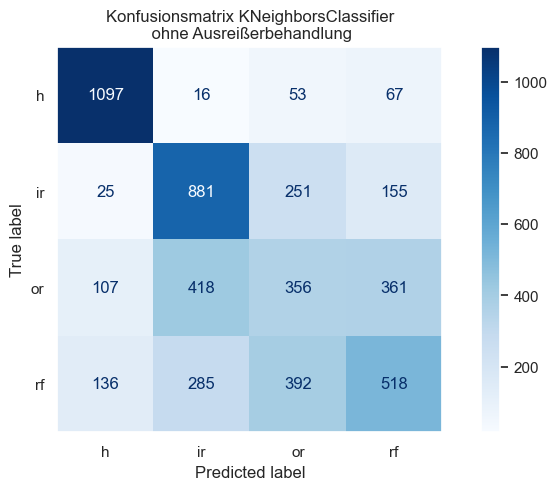

In [99]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n ohne Ausreißerbehandlung"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))

Our model accuracy with k=3 is: 0.6484955060570535
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1233
           1       0.60      0.77      0.68      1312
           2       0.35      0.07      0.12      1242
           3       0.52      0.75      0.61      1331

    accuracy                           0.65      5118
   macro avg       0.61      0.65      0.60      5118
weighted avg       0.61      0.65      0.60      5118



<Figure size 500x500 with 0 Axes>

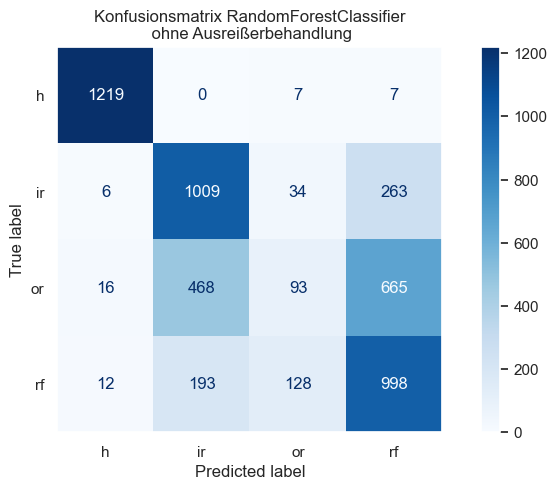

In [100]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred
print(f'Our model accuracy with k=3 is: {clf.score(X_test, y_test)}')

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true= y_test, y_pred=y_pred,cmap=plt.cm.Blues,
                                        display_labels=["h","ir","or","rf"],xticks_rotation="horizontal",ax=ax)
_ = ax.set_title(
    f"Konfusionsmatrix {clf.__class__.__name__}\n ohne Ausreißerbehandlung"
)
plt.grid(visible=False)
print(classification_report(y_test, y_pred))